## **Project Overview**  

The purpose of this project is to master **Exploratory Data Analysis (EDA)** in the job market domain using the **Pandas framework** for data manipulation and **Matplotlib & Seaborn** for visualization.  

### **Goals of the Project:**  
- Explore a job market dataset using **Pandas**.  
- Identify the **most in-demand job titles** and **top hiring companies**.  
- Analyze **salary distributions** and **experience requirements**.  
- Determine the **best locations for tech jobs** based on demand and salary trends.  
- Build **pivot tables** to summarize key insights.  
- Visualize the dataset using **various plot types** for better interpretation.

## **Outline**  
- Materials and Methods
- General Part
  - Libraries Import
  - Dataset Exploration
  - Pivot Tables
  - Visualization in Pandas
- Tasks

## **Materials and Methods**

The dataset consists of job postings collected from various sources, including job titles, company names, salaries, required experience, and job locations. It is publicly available for research and analysis.

The primary objective is to conduct Exploratory Data Analysis (EDA) on job market trends using the Pandas framework. The goal is to identify top job roles, hiring companies, salary distributions, experience levels, and the best locations for tech jobs.

Key questions to be answered:
  1. What are the top job titles in demand?
  2. Which are the top hiring companies?
  3. What is the salary distribution across different job roles?
  4. What is the experience requirement for various positions?
  5. Which locations have the highest job opportunities in tech?

Visualizations will be used to identify patterns and trends that can be useful for job seekers and recruiters.


## **Libraries Import**

The necessary libraries for data analysis and visualization are imported.

In [4]:
!pip install seaborn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.precision", 2)
pd.options.display.float_format = "{:.2f}".format

## **Dataset Exploration**  

  **1. Reading the Dataset** 

We start by reading the dataset and displaying the first five rows:

In [5]:
import pandas as pd

df = pd.read_csv('jobs.csv')
df.head()

,Employment type,Industries,Job function,Seniority level,company,company_id,context,date,description,education,location,months_experience,post_id,post_url,sal_high,sal_low,salary,title
0,Full-time,Broadcast Media,Information Technology,Mid-Senior level,CyberCoders,21836.00,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",NaN,Job Title: Senior Data Engineer Location: Alex...,bachelor degree,"Alexandria, VA",60.00,2632814552,https://www.linkedin.com/jobs/view/senior-data...,nan,nan,NaN,Senior Data Engineer
1,Full-time,"Hospital & Health Care, Medical Devices, and P...",Engineering and Information Technology,Not Applicable,Johnson & Johnson,1207.00,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",NaN,"Ethicon, part of Johnson & Johnson Medical Dev...",bachelor degree,"Santa Clara, CA",96.00,2632810866,https://www.linkedin.com/jobs/view/principal-f...,nan,nan,NaN,Principal Full Stack Software Engineer.
2,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,1035.00,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",NaN,Microsoft’s WCB health team is looking for a S...,bachelor degree,"Washington, DC",84.00,2632812746,https://www.linkedin.com/jobs/view/senior-soft...,189000.00,120000.00,"$120,000.00/yr - $189,000.00/yr",Senior Software Engineer
3,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,1035.00,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",NaN,Microsoft’s WCB health team is looking for a S...,bachelor degree,"Reston, VA",84.00,2632817427,https://www.linkedin.com/jobs/view/senior-soft...,189000.00,120000.00,"$120,000.00/yr - $189,000.00/yr",Senior Software Engineer
4,Full-time,"Computer Hardware, Computer Software, and Info...",Engineering and Information Technology,Not Applicable,Microsoft,1035.00,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",NaN,Microsoft’s WCB health team is looking for a S...,bachelor degree,"Irving, TX",84.00,2632817426,https://www.linkedin.com/jobs/view/senior-soft...,175000.00,108000.00,"$108,000.00/yr - $175,000.00/yr",Senior Software Engineer


**2. Dataset Overview**

Shape of the dataset:

In [6]:
df.shape

(8261, 18)

Feature Names and Types:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8261 entries, 0 to 8260
Data columns (total 18 columns):
Employment type      7768 non-null object
Industries           7172 non-null object
Job function         7172 non-null object
Seniority level      7172 non-null object
company              8261 non-null object
company_id           7780 non-null float64
context              7685 non-null object
date                 7626 non-null object
description          7780 non-null object
education            7527 non-null object
location             8261 non-null object
months_experience    5090 non-null float64
post_id              8261 non-null int64
post_url             8261 non-null object
sal_high             2135 non-null float64
sal_low              2135 non-null float64
salary               2145 non-null object
title                8261 non-null object
dtypes: float64(4), int64(1), object(13)
memory usage: 1.1+ MB


The dataset consists of:

- 2 integer features (company_id, post_id)
- 2 floating-point features (sal_low, sal_high)
- 1 numeric feature (months_experience)
- No missing values in company_id and post_id, but missing values in months_experience, sal_low, and sal_high.

**3. Feature Descriptions**

- **company**: Name of the company *(categorical)*  
- **title**: Job title *(categorical)*  
- **location**: Job location *(categorical)*  
- **type**: Job type *(categorical)*  
- **level**: Seniority level *(categorical)*  
- **sal_low**: Lower bound of salary *(numeric)*  
- **sal_high**: Upper bound of salary *(numeric)*  
- **months_experience**: Required months of experience *(numeric)*  


**4. Statistical Summary**

Numerical Features:

In [8]:
df.describe()

,company_id,months_experience,post_id,sal_high,sal_low
count,7780.00,5090.00,8261.00,2135.00,2135.00
mean,6680768.79,50.46,2679644434.96,150923.40,94313.94
std,15208428.38,28.44,68765226.57,44080.92,27242.37
min,1000.00,3.00,103873348.00,100.00,120.00
25%,4787.00,36.00,2663260001.00,119000.00,75450.00
50%,162479.00,48.00,2682321422.00,151000.00,91300.00
75%,3334793.00,60.00,2693585348.00,180000.00,113000.00
max,80114151.00,180.00,2764037008.00,416000.00,312000.00


Key Observations

- **sal_high** values range from **100 to 416,000**.  
- **months_experience** varies from **3 to 180 months (15 years).**  


Categorical Features:

In [9]:
df.describe(include=['object'])

,Employment type,Industries,Job function,Seniority level,company,context,date,description,education,location,post_url,salary,title
count,7768,7172,7172,7172,8261,7685,7626,7780,7527,8261,8261,2145,8261
unique,7,694,195,7,2634,7685,7626,5568,3,919,8173,1336,2557
top,Full-time,"Information Technology and Services, Computer ...",Engineering and Information Technology,Not Applicable,Apple,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",2021-08-30 17:33:16.199996,The volunteer opportunity below is a request f...,bachelor degree,United States,https://www.linkedin.com/jobs/view/software-en...,"$118,000.00/yr - $200,000.00/yr",Data Scientist
freq,7186,695,4694,2310,645,1,1,39,7458,527,2,65,769


**5. Sorting Data**

Sorting by months_exp (descending):

In [10]:
df.sort_values(by='months_experience', ascending=False).head()

,Employment type,Industries,Job function,Seniority level,company,company_id,context,date,description,education,location,months_experience,post_id,post_url,sal_high,sal_low,salary,title
2988,Full-time,"Information Technology and Services, Computer ...",Engineering and Information Technology,Associate,Greenlots,1180889.00,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",2021-08-06 17:55:18.797354,"Los Angeles, CA Greenlots is unlocking the pos...",bachelor degree,"Los Angeles, CA",180.00,2668319413,https://www.linkedin.com/jobs/view/lead-site-r...,nan,nan,NaN,Lead Site Reliability Engineer
2620,Full-time,Computer Hardware,Information Technology,Not Applicable,IBM,1009.00,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",2021-08-05 11:57:03.911977,"Introduction As a Data Scientist at IBM, you w...",bachelor degree,"Austin, TX",180.00,2660074610,https://www.linkedin.com/jobs/view/data-scient...,nan,nan,NaN,Data Scientist
4865,Full-time,Information Technology and Services,Engineering and Information Technology,Mid-Senior level,Nagarro,11902.00,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",2021-08-19 18:13:39.287404,"Established in 1996, Nagarro began as a dream ...",bachelor degree,"New York, United States",180.00,2688771685,https://www.linkedin.com/jobs/view/site-reliab...,nan,nan,NaN,Site Reliability Engineer
6341,Full-time,Computer Hardware,Information Technology,Not Applicable,IBM,1009.00,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",2021-08-26 23:02:24.315357,"Introduction As a Data Scientist at IBM, you w...",bachelor degree,"Austin, TX",180.00,2693554961,https://www.linkedin.com/jobs/view/data-scient...,nan,nan,NaN,Data Scientist
2419,Contract,"Information Technology and Services, Computer ...",Engineering and Information Technology,Entry level,Dice,6849.00,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",2021-08-02 21:41:49.135564,Dice is the leading career destination for tec...,bachelor degree,"Denver, CO",180.00,2671787173,https://www.linkedin.com/jobs/view/site-reliab...,nan,nan,NaN,Site reliability engineer


- Highest experience required: **180 months (15 years)**

Sorting by salary (sal_high) (descending):

In [11]:
df.sort_values(by='sal_high', ascending=False).head()

,Employment type,Industries,Job function,Seniority level,company,company_id,context,date,description,education,location,months_experience,post_id,post_url,sal_high,sal_low,salary,title
6503,Full-time,Oil & Energy,Information Technology,Associate,"AllTech Systems, Inc.",1507659.00,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",2021-08-30 17:49:18.871675,Description The Digital Twin & Rich Media team...,bachelor degree,Greater Houston,nan,2702731747,https://www.linkedin.com/jobs/view/machine-lea...,416000.00,312000.00,$150.00/hr - $200.00/hr,Machine Learning Engineer V
2175,Full-time,Information Technology and Services,Engineering and Information Technology,Mid-Senior level,Quantitative Systems,9848517.00,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",2021-08-02 20:51:22.889836,We are a global leader in management consultin...,bachelor degree,"New York, NY",nan,2635811289,https://www.linkedin.com/jobs/view/digital-pri...,350000.00,200000.00,"$200,000.00/yr - $350,000.00/yr",Digital Principal Data Scientist
2642,Full-time,Investment Management and Financial Services,Finance and Research,Not Applicable,Sartre Group,3075240.00,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",2021-08-05 11:59:27.847717,We’re partnering with one of the best performi...,bachelor degree,"New York, United States",nan,2669466843,https://www.linkedin.com/jobs/view/investment-...,300000.00,150000.00,"$150,000.00/yr - $300,000.00/yr",Investment Data Scientist
8019,Full-time,NaN,NaN,NaN,NewslyMeApp,42931852.00,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",2021-10-17 23:13:58.887407,"Before you apply for the position, we ask you ...",bachelor degree,New York City Metropolitan Area,12.00,2754065876,https://www.linkedin.com/jobs/view/data-scient...,300000.00,80000.00,"$80,000.00/yr - $300,000.00/yr",Data Scientist
2717,Full-time,"Marketing and Advertising, Computer Software, ...",Engineering and Information Technology,Associate,GoFundMe,1271240.00,"{""@context"": ""http://schema.org"", ""@type"": ""Jo...",2021-08-05 12:12:22.726192,Do you believe that people should compassionat...,bachelor degree,"San Diego, CA",60.00,2673361149,https://www.linkedin.com/jobs/view/senior-site...,284700.00,131100.00,"$131,100.00/yr - $284,700.00/yr",Senior Site Reliability Engineer


Highest salary: **416,000**

## Pivot Tables

**1. Average Salary by Months of Experience**

In [12]:
pivot1 = df.pivot_table(values=['sal_low', 'sal_high'], index='months_experience', aggfunc='mean')
pivot1.head()

,sal_high,sal_low
months_experience,,
6.00,136000.00,70300.00
12.00,137795.12,85370.18
24.00,145379.31,89104.31
36.00,155843.31,96679.80
48.00,141788.45,92769.66


- This shows the average lower and upper salary for each level of experience.

**2. Salary Distribution by Company**

In [13]:
pivot2 = df.pivot_table(values=['sal_low', 'sal_high'], index='company_id', aggfunc=['mean', 'max', 'min'])
pivot2.head()

mean                max                 min         
            sal_high  sal_low  sal_high   sal_low  sal_high  sal_low
company_id                                                          
1000.00    141000.00 88455.56 167000.00 110000.00 119000.00 78200.00
1001.00    136000.00 79500.00 136000.00  79500.00 136000.00 79500.00
1009.00    133500.00 70100.00 138000.00  74200.00 129000.00 66000.00
1016.00    132000.00 94100.00 132000.00  94100.00 132000.00 94100.00
1025.00    146500.00 79150.00 161000.00  89200.00 107000.00 72300.00

- This gives the mean, max, and min salary offered by each company.

**3. Number of Job Posts by Experience Requirement**

In [14]:
pivot3 = df.pivot_table(values='post_id', index='months_experience', aggfunc='count')
pivot3.head()

,post_id
months_experience,
3.00,1
6.00,9
12.00,349
18.00,1
24.00,899


- This counts how many job postings require a specific number of experience months.

## Visualization in Pandas

**1. Top Job Titles in Demand**

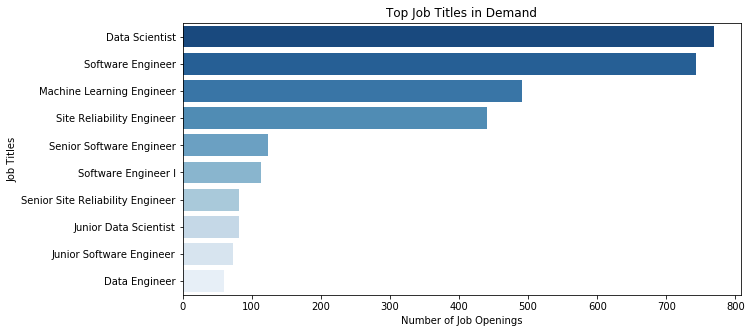

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

top_titles = df['title'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_titles.values, y=top_titles.index, palette='Blues_r')
plt.xlabel('Number of Job Openings')
plt.ylabel('Job Titles')
plt.title('Top Job Titles in Demand')
plt.show()


- Shows the most frequently posted job titles.
- **Data Scientist** is the top job title in demand.

**2. Top Hiring Companies**

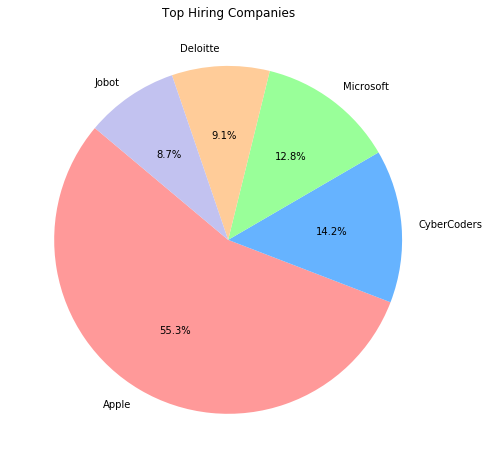

In [27]:
import matplotlib.pyplot as plt

top_companies = df['company'].value_counts().head(5)  # Top 5 hiring companies

plt.figure(figsize=(8, 8))
plt.pie(top_companies, labels=top_companies.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'], startangle=140)
plt.title("Top Hiring Companies")
plt.show()

- The list shows companies with the highest number of job postings.
- **Apple** has the most job openings among all companies.

**3. Salary Distribution Across Job Roles**

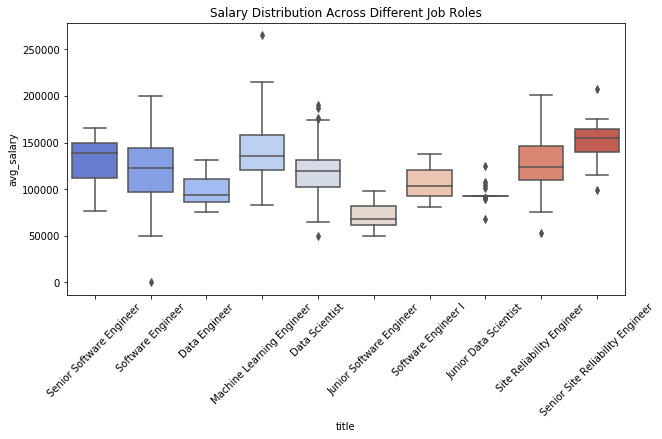

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

df['avg_salary'] = (df['sal_low'] + df['sal_high']) / 2
top_jobs = df['title'].value_counts().head(10).index
df_top = df[df['title'].isin(top_jobs)]

plt.figure(figsize=(10, 5))
sns.boxplot(x='title', y='avg_salary', data=df_top, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Salary Distribution Across Different Job Roles")
plt.show()


- Shows salary distribution for top job roles.
- **Data Scientist & Software Engineer** have higher salaries.
- **Customer Support & Intern roles** have lower salaries.

**4. Experience Requirement for Various Positions**

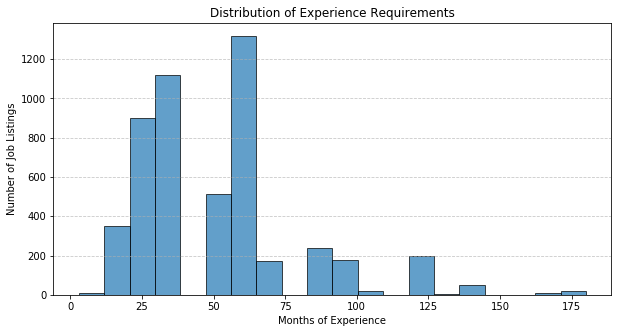

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df['months_experience'].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Months of Experience")
plt.ylabel("Number of Job Listings")
plt.title("Distribution of Experience Requirements")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Shows experience requirements for different roles.
- The majority of job listings require **25 to 50 months** of experience, with a peak around **50 months**.

**5. Locations with Highest Job Opportunities in Tech**

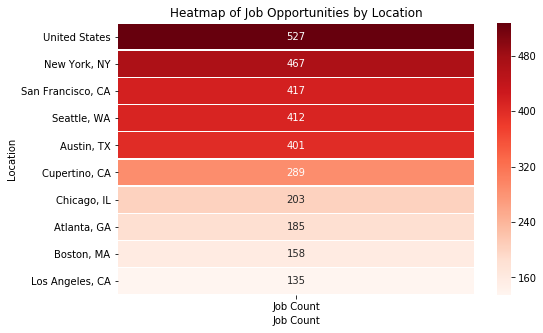

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count job postings by location
location_counts = df['location'].value_counts().head(10).reset_index()
location_counts.columns = ['Location', 'Job Count']

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(location_counts.set_index('Location'), annot=True, cmap='Reds', linewidths=0.5, fmt='d')
plt.title("Heatmap of Job Opportunities by Location")
plt.xlabel("Job Count")
plt.show()

- Showcases the top locations with the highest number of tech job postings.
- **United States** has the most job opportunities in the tech industry.